In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV

C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
dataset = datasets.load_digits()
data, target = dataset['data'], dataset['target']

data.shape, target.shape

((1797, 64), (1797,))

Desicion tree
Answer 1: 0.8147463323157016


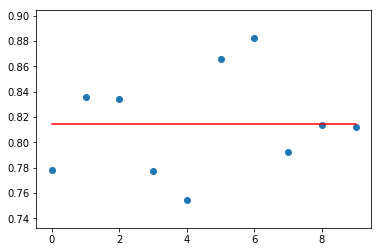

In [3]:
desicion_tree = DecisionTreeClassifier()
score = cross_val_score(desicion_tree, data, target, cv=10)

print("Desicion tree")
print('Answer 1:', score.mean())

plt.scatter(np.array(range(10)), score.T)
plt.plot([0, 9], [score.mean(), score.mean()], color='red');

Bagging of 100 desicion trees
Answer 2: 0.9210496568308768


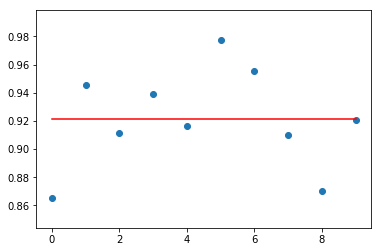

In [4]:
desicion_tree = DecisionTreeClassifier()
bagging = BaggingClassifier(desicion_tree, n_estimators=100)
score = cross_val_score(bagging, data, target, cv=10)

print("Bagging of 100 desicion trees")
print('Answer 2:', score.mean())

plt.scatter(np.array(range(10)), score.T)
plt.plot([0, 9], [score.mean(), score.mean()], color='red');

Bagging with sqrt(features) of 100 desicion trees
Answer 3: 0.9254854666641465


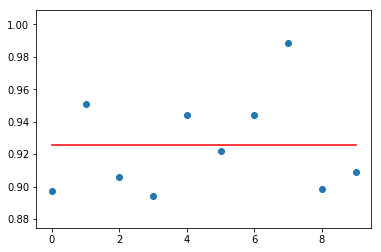

In [5]:
desicion_tree = DecisionTreeClassifier()
bagging = BaggingClassifier(desicion_tree, n_estimators=100, max_features=int(np.sqrt(data.shape[1])))
score = cross_val_score(bagging, data, target, cv=10)

print("Bagging with sqrt(features) of 100 desicion trees")
print('Answer 3:', score.mean())

plt.scatter(np.array(range(10)), score.T)
plt.plot([0, 9], [score.mean(), score.mean()], color='red');

Bagging of 100 desicion trees with sqrt(features)
Answer 4: 0.9494381928488386


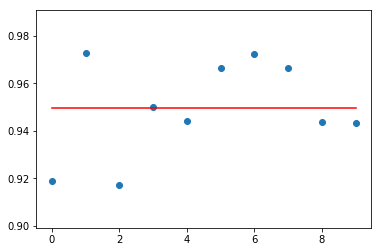

In [71]:
desicion_tree = DecisionTreeClassifier(max_features=int(np.sqrt(data.shape[1])))
bagging = BaggingClassifier(desicion_tree, n_estimators=100)
score = cross_val_score(bagging, data, target, cv=10)

print("Bagging of 100 desicion trees with sqrt(features)")
print('Answer 4:', score.mean())

plt.scatter(np.array(range(10)), score.T)
plt.plot([0, 9], [score.mean(), score.mean()], color='red');

Random forest from package
Mean score: 0.9539252952567672


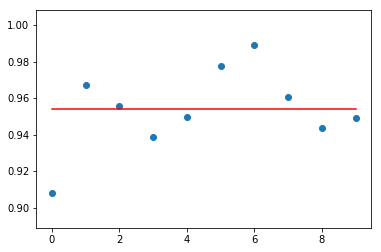

In [74]:
random_forest = RandomForestClassifier(n_estimators=100, max_features=int(np.sqrt(data.shape[1])))
score = cross_val_score(random_forest, data, target, cv=10)

print("Random forest from package")
print('Mean score:', score.mean())

plt.scatter(np.array(range(10)), score.T)
plt.plot([0, 9], [score.mean(), score.mean()], color='red');

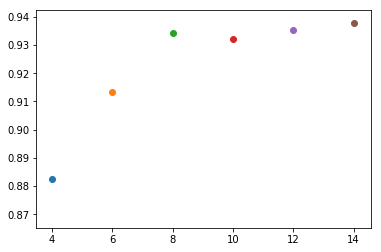

In [6]:

for trees in range(4, 16, 2):
    random_forest = RandomForestClassifier(n_estimators=100, max_features=int(np.sqrt(data.shape[1])), max_depth=trees)
    score = cross_val_score(random_forest, data, target, cv=5)
    plt.scatter([trees], [score.mean()])
    

1) Случайный лес сильно переобучается с ростом количества деревьев

__+ 2) При очень маленьком числе деревьев (5, 10, 15), случайный лес работает хуже, чем при большем числе деревьев__

__+ 3) С ростом количества деревьев в случайном лесе, в какой-то момент деревьев становится достаточно для высокого качества классификации, а затем качество существенно не меняется.__

__+ 4) При большом количестве признаков (для данного датасета - 40, 50) качество классификации становится хуже, чем при малом количестве признаков (5, 10). Это связано с тем, что чем меньше признаков выбирается в каждом узле, тем более различными получаются деревья (ведь деревья сильно неустойчивы к изменениям в обучающей выборке), и тем лучше работает их композиция.__

5) При большом количестве признаков (40, 50, 60) качество классификации лучше, чем при малом количестве признаков (5, 10). Это связано с тем, что чем больше признаков - тем больше информации об объектах, а значит алгоритм может делать прогнозы более точно.

6) При небольшой максимальной глубине деревьев (5-6) качество работы случайного леса намного лучше, чем без ограничения глубины, т.к. деревья получаются не переобученными. С ростом глубины деревьев качество ухудшается.

__+ 7) При небольшой максимальной глубине деревьев (5-6) качество работы случайного леса заметно хуже, чем без ограничений, т.к. деревья получаются недообученными. С ростом глубины качество сначала улучшается, а затем не меняется существенно, т.к. из-за усреднения прогнозов и различий деревьев их переобученность в бэггинге не сказывается на итоговом качестве (все деревья преобучены по-разному, и при усреднении они компенсируют переобученность друг-друга).__

__Правильные ответы: 2, 3, 4, 7__